# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

This report sets out to identify potential relationships between 2017-2018 SAT and ACT participation rates and scores, as well as State Debt and State Income Statistics to identify opportunities for increasing SAT participation rates moving forward.

## Executive Summary

The Common Core State Standards Initiatives seeks to establish consistent educational standards across the states as well as ensure that students graduating from high school are prepared to enter credit-bearing courses. Forty-two states, District of Columbia have chosen to adopt these Standards although no exact requirements for curriculum, schools and districts are specified. Both SAT and ACT test accomplish many of the goals aligned with the Common Core Standards.

This project sets out to examine the data covering participation rates and scores for both ACT and SAT for 2017 and 2018 at state levels. This allowed for exploration of any relationships between the participation rates for the 2 tests and the respective scores. A further analysis of correlations was performed between the participation rates, state income and state debt. 

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used should be added here*

In [1]:
#Import of libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Read in the csv files:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Print the first 10 rows of each dataframe:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Print the first 10 rows of each dataframe
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
- 'State': Refer to U.S.States and 'National' means all across U.S.
- 'Participation': percentage of students who participated in the respective tests
- 'English', 'Math', 'Science', 'Read', 'Reading and Writing' refer to the subjects and the corresponding average scores for each subject
- 'Total' refers to the sum of average scores for the 2 subjects for SAT (i.e. Read and Write and Math)
- 'Composite' refers to the mean of all average scores of the subjects for ACT (i.e. English, Math, Scicence and Reading)


#### 4a. Does the data look complete? 

Answer:
- Total number of students are not provided but only the percentages therefore states with higher population could have a lower participation rate even though the same number of participants may have taken the same test compared to another state with lower population. 
- It does not indicate which are the states whereby these tests are compulsory (as the participation rates have different) which again will increase the population and percentage of participants taking the tests.
- It does not provide the distribution of the scores for each subject and state.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [5]:
#Max results for SAT 2017
sat_2017.max()

State                                 Wyoming
Participation                             96%
Evidence-Based Reading and Writing        644
Math                                      651
Total                                    1295
dtype: object

In [6]:
#Max results for ACT 2017
act_2017.max()

State            Wyoming
Participation        98%
English             25.5
Math                25.3
Reading               26
Science             24.9
Composite           25.5
dtype: object

In [7]:
#Min results for ACT 2017
act_2017.min()

State            Alabama
Participation        60%
English             16.3
Math                  18
Reading             18.1
Science              2.3
Composite           17.8
dtype: object

In [8]:
#Max results for SAT 2017
sat_2017.min()

State                                 Alabama
Participation                             10%
Evidence-Based Reading and Writing        482
Math                                       52
Total                                     950
dtype: object

In [9]:
#Display the overall statistics for SAT 2017
sat_2017.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,Indiana,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


In [10]:
#Check for the line item below the SAT minimum score of 200
sat_2017[sat_2017['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
#Display the overall statistics for ACT 2017
act_2017.describe(include='all')

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52
unique,52,28,NaN,NaN,NaN,NaN,38
top,Indiana,100%,NaN,NaN,NaN,NaN,19.8
freq,1,17,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,20.919231,21.173077,22.001923,21.040385,NaN
std,NaN,NaN,2.332132,1.963602,2.048672,3.151113,NaN
min,NaN,NaN,16.300000,18.000000,18.100000,2.300000,NaN
25%,NaN,NaN,19.000000,19.400000,20.475000,19.900000,NaN
50%,NaN,NaN,20.550000,20.900000,21.700000,21.150000,NaN
75%,NaN,NaN,23.300000,23.100000,24.125000,22.525000,NaN


In [12]:
#Check for the line item which is showing 2.3 as the minimum score for science
act_2017[act_2017['Science']<18]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer:
- There are 2 apparent outliers in the scores for Science (ACT) and Math (SAT) for Maryland as both does not add up to the Total/Composite score and should be replaced with the numbers from the sources. 
- In addition, the Composite score for ACT 2017 and Participation rate for SAT 2017 is showing as NaN which should not be the case indicating an issue with the data set.


In [13]:
#Check for the unique values for Composite
act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [14]:
#Check for the data types of ACT_2017
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [15]:
#Check for the data types of SAT_2017
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [16]:
#replace the values for Science based on the composite score of ACT which is defined as the average of 4 subjects rounded to the nearest whole number
act_2017.loc[21,'Science'] = 23.2

In [17]:
#replace the value for Math for line 20 based on the total score provided
sat_2017.loc[20,'Math'] = 524

#### 5. What are your data types? 
Display the data types of each feature. 

In [18]:
#Display data types
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [19]:
#Display data types
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
- Participation and Composite are both object for data type due to values of string type therefore arithmetic functions cannot be performed and should be converted.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
#coverting percentages to floats
def remove_percent(x):
    return float(x.strip('%'))/100

act_2017['Participation'] = act_2017['Participation'].map(remove_percent)

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
#Remove percentage
sat_2017['Participation'] = sat_2017['Participation'].map(remove_percent)

In [22]:
#Convert data types
sat_2017['Math'] = sat_2017['Math'].astype('float64')

In [23]:
#Convert data types
sat_2017['Total'] = sat_2017['Total'].astype('float64')

In [24]:
#Convert data types
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].astype('float64')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [25]:
#Strip x from value
act_2017['Composite'] = act_2017['Composite'].apply(lambda x_cell: x_cell.strip('x'))

In [26]:
#Change data type
act_2017['Composite'] = act_2017['Composite'].astype('float64')

- Display the data types again to confirm they are correct.

In [27]:
#Check code modifications
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [28]:
#Check code modifications
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
#Rename columns for ACT 2017
new_columns_act17 = act_2017.rename(columns={'State': 'state','Participation':'act17_participation', 'English':'act17_english','Reading': 'act17_reading','Science': 'act17_science', 'Composite': 'act17_composite', 'Math': 'act17_math'})

In [30]:
#Rename columns for SAT 2017
new_columns_sat17 = sat_2017.rename(columns={'State': 'state','Participation':'sat17_participation','Math': 'sat17_math', 'Evidence-Based Reading and Writing': 'sat17_read_and_write', 'Total': 'total_sat17'})

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


*Please refer to executive summary for data dictonary

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [31]:
#Drop the row for National
new_columns_act17.drop([0], inplace=True)

In [32]:
#Check if the row has been dropped
new_columns_act17.head()

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Merge dataframes of 2017 ACT and SAT:
merge_data = pd.merge(new_columns_sat17, new_columns_act17, how='inner', on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#Rename dataframe
combined_2017 = merge_data

In [35]:
#Save out data to csv file
combined_2017.to_csv(r'../data/combined_2017.csv', index = False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [36]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018_updated = pd.read_csv('../data/act_2018_updated.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [37]:
#Check data types
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [38]:
#Check data types
act_2018_updated.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [39]:
#Convert data types
act_2018_updated['Percentage of Students Tested'] = act_2018_updated['Percentage of Students Tested'].astype('float64')/100

In [40]:
#Convert data types
sat_2018['Participation'] =sat_2018['Participation'].str.rstrip('%').astype('float')/100

In [41]:
#Convert data types
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].astype('float64')

In [42]:
#Convert data types
sat_2018['Math'] = sat_2018['Math'].astype('float64')

In [43]:
#Convert data types
sat_2018['Total'] = sat_2018['Total'].astype('float64')

In [44]:
#Rename columns for ACT 2018
new_columns_act18 = act_2018_updated.rename(columns={'State': 'state','Percentage of Students Tested':'act18_participation', 'Average English Score':'act18_english','Average Reading Score': 'act18_reading','Average Science Score': 'act18_science', 'Average Composite Score': 'act18_composite', 'Average Math Score': 'act18_math'})

In [45]:
#Rename columns for SAT 2018
new_columns_sat18 = sat_2018.rename(columns={'State': 'state','Participation':'sat18_participation','Math': 'sat18_math', 'Evidence-Based Reading and Writing': 'sat18_read_and_write', 'Total': 'total_sat18'})

In [46]:
#Merge SAT and ACT 2018 
combined_2018 = pd.merge(new_columns_sat18, new_columns_act18, how='inner', on='state')

In [47]:
#Check combined 2018 info for correctness
combined_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   sat18_participation   51 non-null     float64
 2   sat18_read_and_write  51 non-null     float64
 3   sat18_math            51 non-null     float64
 4   total_sat18           51 non-null     float64
 5   act18_participation   51 non-null     float64
 6   act18_composite       51 non-null     float64
 7   act18_english         51 non-null     float64
 8   act18_math            51 non-null     float64
 9   act18_reading         51 non-null     float64
 10  act18_science         51 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.8+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
final=pd.merge(combined_2018, combined_2017, how='inner', on='state')

In [49]:
final.to_csv(r'../data/final.csv', index = False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [50]:
#Transpose the output
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat18_participation,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
sat18_read_and_write,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
sat18_math,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_sat18,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
act18_participation,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
act18_composite,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6
act18_english,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
act18_math,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
act18_reading,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
act18_science,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [51]:
#std deviation formula
#code
def std_dev(values):
    n = len(values)
    mean = sum(values)/n
    x = 0
    for i in values:
        x += (i-mean)**2
    var = x/n
    std = var**0.5    
    return std

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [52]:
#Dictionary comprehension
std_dev_dict = {k:std_dev(final[k]) for k in final.columns[1:]}

In [53]:
std_dev_dict

{'sat18_participation': 0.3694661922353942,
 'sat18_read_and_write': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'total_sat18': 93.22742384464433,
 'act18_participation': 0.33745194881997503,
 'act18_composite': 2.0855261815801147,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543,
 'sat17_participation': 0.3492907076664507,
 'sat17_read_and_write': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'act17_participation': 0.3182417575123181,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989}

In [54]:
np.std(final['sat18_participation'])

0.3694661922353942

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer
- The calculated standard deviation match up to numpy but some difference from pandas describe

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [55]:
#code
#Sort the max results for SAT2017 by participation rate
highest_sat17part = final.sort_values(by=['sat17_participation'], ascending=False).head(10)
highest_sat17part[['state','sat17_participation']]

,state,sat17_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96
19,Maine,0.95
12,Idaho,0.93
9,Florida,0.83
21,Massachusetts,0.76
39,Rhode Island,0.71


In [56]:
#Sort the max results for SAT2018 by participation rate
highest_sat18part = final.sort_values(by=['sat18_participation'], ascending=False).head(10)
highest_sat18part[['state','sat18_participation']]

,state,sat18_participation
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96
8,District of Columbia,0.92


In [57]:
#Sort the max results for ACT2018 by participation rate
highest_act18part = final.sort_values(by=['act18_participation'], ascending=False).head(20)
highest_act18part[['state','act18_participation']]

,state,act18_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Ohio,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [58]:
#Sort the max results for ACT2017 by participation rate
highest_act17part = final.sort_values(by=['act17_participation'], ascending=False).head(20)
highest_act17part[['state','act17_participation']]

,state,act17_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
35,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [59]:
#Sort the min results for SAT2017 by participation rate
lowest_sat17part = final.sort_values(by=['sat17_participation'], ascending=False).tail(10)
lowest_sat17part[['state','sat17_participation']]

,state,sat17_participation
49,Wisconsin,0.03
25,Missouri,0.03
41,South Dakota,0.03
27,Nebraska,0.03
23,Minnesota,0.03
3,Arkansas,0.03
50,Wyoming,0.03
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


In [60]:
#Sort the min results for SAT2018 by partcipation rate
lowest_sat18part = final.sort_values(by=['sat18_participation'], ascending=False).tail(10)
lowest_sat18part[['state','sat18_participation']]

,state,sat18_participation
18,Louisiana,0.04
17,Kentucky,0.04
16,Kansas,0.04
41,South Dakota,0.03
27,Nebraska,0.03
24,Mississippi,0.03
15,Iowa,0.03
49,Wisconsin,0.03
50,Wyoming,0.03
34,North Dakota,0.02


In [61]:
#Sort the min results for ACT2017 by partcipation rate
lowest_act17part = final.sort_values(by=['act17_participation'], ascending=False).tail(10)
lowest_act17part[['state','act17_participation']]

,state,act17_participation
21,Massachusetts,0.29
45,Vermont,0.29
46,Virginia,0.29
47,Washington,0.29
20,Maryland,0.28
38,Pennsylvania,0.23
39,Rhode Island,0.21
7,Delaware,0.18
29,New Hampshire,0.18
19,Maine,0.08


In [62]:
#Sort the min results for ACT2018 by partcipation rate
lowest_act18part = final.sort_values(by=['act18_participation'], ascending=False).tail(10)
lowest_act18part[['state','act18_participation']]

,state,act18_participation
21,Massachusetts,0.25
45,Vermont,0.24
46,Virginia,0.24
47,Washington,0.24
22,Michigan,0.22
38,Pennsylvania,0.20
7,Delaware,0.17
29,New Hampshire,0.16
39,Rhode Island,0.15
19,Maine,0.07


In [63]:
#Sort the max results for SAT2017 by Total Scores
highest_sat17_total = final.sort_values(by=['total_sat17'], ascending=False).head(10)
highest_sat17_total[['state','total_sat17']]

,state,total_sat17
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0
34,North Dakota,1256.0
27,Nebraska,1253.0
17,Kentucky,1247.0
24,Mississippi,1242.0
44,Utah,1238.0


In [64]:
#Sort the max results for SAT2018 by Total Scores
highest_sat18_total= final.sort_values(by=['total_sat18'], ascending=False).head(10)
highest_sat18_total[['state','total_sat18']]

,state,total_sat18
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0
25,Missouri,1262.0
50,Wyoming,1257.0
27,Nebraska,1252.0
17,Kentucky,1248.0
41,South Dakota,1240.0


In [65]:
#Sort the max results for ACT2017 by Composite Scores
highest_act17_comp = final.sort_values(by=['act17_composite'], ascending=False).head(10)
highest_act17_comp[['state','act17_composite']]

,state,act17_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2
32,New York,24.2
22,Michigan,24.1
7,Delaware,24.1
39,Rhode Island,24.0
30,New Jersey,23.9


In [66]:
#Sort the max results for ACT2018 by Composite Scores
highest_act18_total = final.sort_values(by=['act18_composite'], ascending=False).head(10)
highest_act18_total[['state','act18_composite']]

,state,act18_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4
39,Rhode Island,24.2
45,Vermont,24.1
19,Maine,24.0
46,Virginia,23.9
13,Illinois,23.9


In [67]:
#Sort the min results for SAT2017 by Total Scores
lowest_sat17_total = final.sort_values(by=['total_sat17'], ascending=False).tail(10)
lowest_sat17_total[['state','total_sat17']]

,state,total_sat17
10,Georgia,1050.0
35,Oklahoma,1047.0
6,Connecticut,1041.0
43,Texas,1020.0
9,Florida,1017.0
19,Maine,1012.0
12,Idaho,1005.0
22,Michigan,1005.0
7,Delaware,996.0
8,District of Columbia,950.0


In [68]:
#Sort the min results for SAT2018 by Total Scores
lowest_sat18_total = final.sort_values(by=['total_sat18'], ascending=False).tail(10)
lowest_sat18_total[['state','total_sat18']]

,state,total_sat18
13,Illinois,1019.0
39,Rhode Island,1018.0
19,Maine,1013.0
22,Michigan,1011.0
44,Utah,1010.0
11,Hawaii,1010.0
12,Idaho,1001.0
48,West Virginia,999.0
7,Delaware,998.0
8,District of Columbia,977.0


In [69]:
#Sort the min results for ACT2018 by Total Scores
lowest_act18_total = final.sort_values(by=['act18_composite'], ascending=False).tail(10)
lowest_act18_total[['state','act18_composite']]

,state,act18_composite
3,Arkansas,19.4
35,Oklahoma,19.3
18,Louisiana,19.2
2,Arizona,19.2
33,North Carolina,19.1
0,Alabama,19.1
11,Hawaii,18.9
24,Mississippi,18.6
40,South Carolina,18.3
28,Nevada,17.7


In [70]:
#Sort the min results for ACT2017 by Total Scores
lowest_act17_total = final.sort_values(by=['act17_composite'], ascending=False).tail(10)
lowest_act17_total[['state','act17_composite']]

,state,act17_composite
2,Arizona,19.7
18,Louisiana,19.5
35,Oklahoma,19.4
3,Arkansas,19.4
0,Alabama,19.2
33,North Carolina,19.1
11,Hawaii,19.0
40,South Carolina,18.7
24,Mississippi,18.6
28,Nevada,17.8


In [71]:
#Change in SAT participation rates between 2017 and 2018
final[(final['sat17_participation'] == 1.0) & (final['sat18_participation'] < 1.0)]

,state,sat18_participation,sat18_read_and_write,sat18_math,total_sat18,act18_participation,act18_composite,act18_english,act18_math,act18_reading,...,sat17_participation,sat17_read_and_write,sat17_math,total_sat17,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
8,District of Columbia,0.92,497.0,480.0,977.0,0.32,23.6,23.7,22.7,24.4,...,1.0,482.0,468.0,950.0,0.32,24.4,23.5,24.9,23.5,24.2


In [72]:
#Change in ACT participation rates between 2017 and 2018
final[(final['act18_participation'] == 1.0) & (final['act17_participation'] < 1.0)]

,state,sat18_participation,sat18_read_and_write,sat18_math,total_sat18,act18_participation,act18_composite,act18_english,act18_math,act18_reading,...,sat17_participation,sat17_read_and_write,sat17_math,total_sat17,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
27,Nebraska,0.03,629.0,623.0,1252.0,1.0,20.1,19.4,19.8,20.4,...,0.03,629.0,625.0,1253.0,0.84,20.9,20.9,21.9,21.5,21.4
36,Ohio,0.18,552.0,547.0,1099.0,1.0,20.3,19.3,20.3,20.8,...,0.12,578.0,570.0,1149.0,0.75,21.2,21.6,22.5,22.0,22.0


In [73]:
#States with more than 0.5 participation rate for both tests in 2018
final[(final['sat18_participation'] > 0.5) & (final['act18_participation'] > 0.5)]

,state,sat18_participation,sat18_read_and_write,sat18_math,total_sat18,act18_participation,act18_composite,act18_english,act18_math,act18_reading,...,sat17_participation,sat17_read_and_write,sat17_math,total_sat17,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
9,Florida,0.56,550.0,549.0,1099.0,0.66,19.9,19.2,19.3,21.1,...,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.70,542.0,522.0,1064.0,0.53,21.4,20.9,20.7,21.2,...,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.56,480.0,530.0,1010.0,0.89,18.9,18.2,19.0,19.1,...,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,19.0
33,North Carolina,0.52,554.0,543.0,1098.0,1.00,19.1,18.0,19.3,19.5,...,0.49,546.0,535.0,1081.0,1.00,17.8,19.3,19.6,19.3,19.1
40,South Carolina,0.55,547.0,523.0,1070.0,1.00,18.3,17.3,18.2,18.6,...,0.50,543.0,521.0,1064.0,1.00,17.5,18.6,19.1,18.9,18.7


In [74]:
##States with more than 0.5 participation rate for both tests in 2017
final[(final['sat17_participation'] > 0.5) & (final['act17_participation'] > 0.5)]

,state,sat18_participation,sat18_read_and_write,sat18_math,total_sat18,act18_participation,act18_composite,act18_english,act18_math,act18_reading,...,sat17_participation,sat17_read_and_write,sat17_math,total_sat17,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
9,Florida,0.56,550.0,549.0,1099.0,0.66,19.9,19.2,19.3,21.1,...,0.83,520.0,497.0,1017.0,0.73,19.0,19.4,21.0,19.4,19.8
10,Georgia,0.70,542.0,522.0,1064.0,0.53,21.4,20.9,20.7,21.2,...,0.61,535.0,515.0,1050.0,0.55,21.0,20.9,22.0,21.3,21.4
11,Hawaii,0.56,480.0,530.0,1010.0,0.89,18.9,18.2,19.0,19.1,...,0.55,544.0,541.0,1085.0,0.90,17.8,19.2,19.2,19.3,19.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

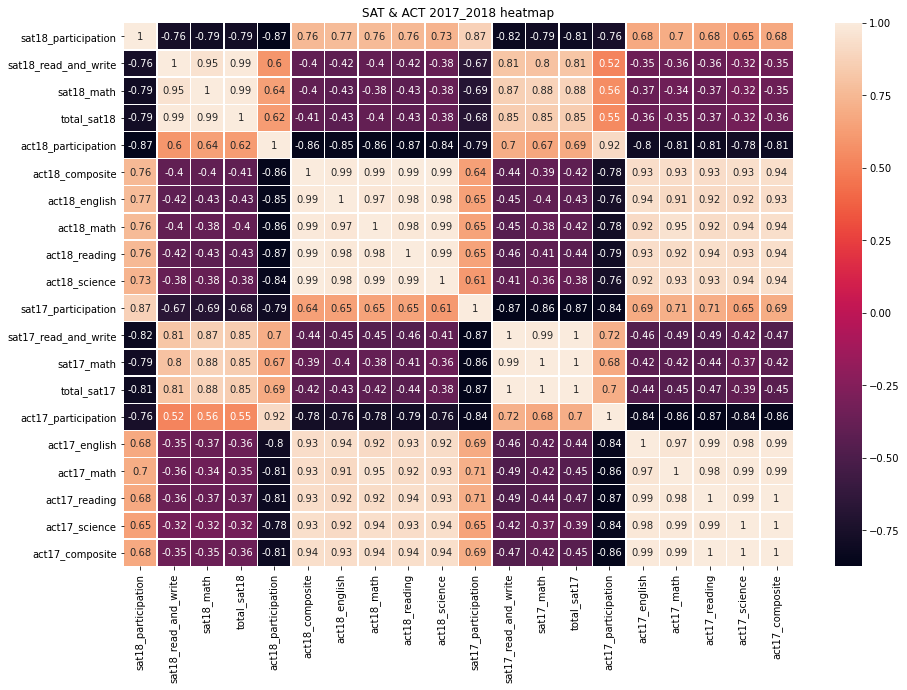

In [75]:
plt.figure(figsize=(15,10))
plt.title('SAT & ACT 2017_2018 heatmap')
sns.heatmap(final.corr(), linewidths=.4, annot=True)


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [76]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], edgecolor='black', linewidth=2) # feel free to add more settings

        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=12)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=12)
        ax[i].set_ylabel('Number of States',fontsize=12)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

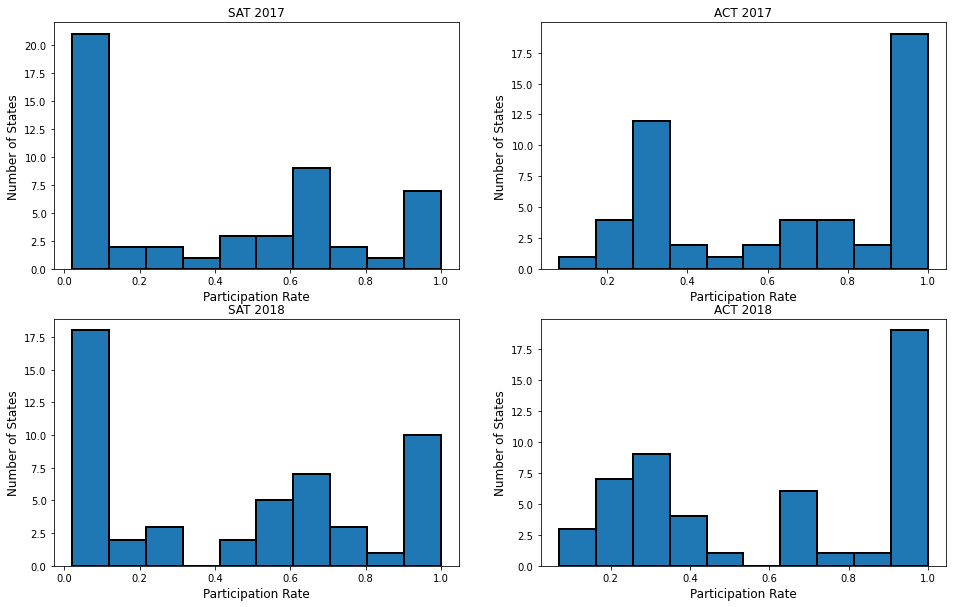

In [77]:
# Code for histograms
list_of_columns = ['sat17_participation','act17_participation','sat18_participation','act18_participation']

list_of_titles = ['SAT 2017','ACT 2017','SAT 2018','ACT 2018']

list_of_xlabels = ['Participation Rate' for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

These histograms shows the participation rates in bins and plotted against the number of states, providiing a view of the number of states in participate rate / per bin. E.g, low participation rates in SAT 2017 is mirrored by a high participation rate in ACT in 2017  and the same phenonmenal for 2018. This is likely to indicate that students are taking either of the two tests and ACT test is a requirement in more states than SAT as evident from the number of states in the 1.0 (100%) bin compared to SAT. Very few states fall in the bins in between and these are likely for states whereby the tests are taken on voluntary basis.

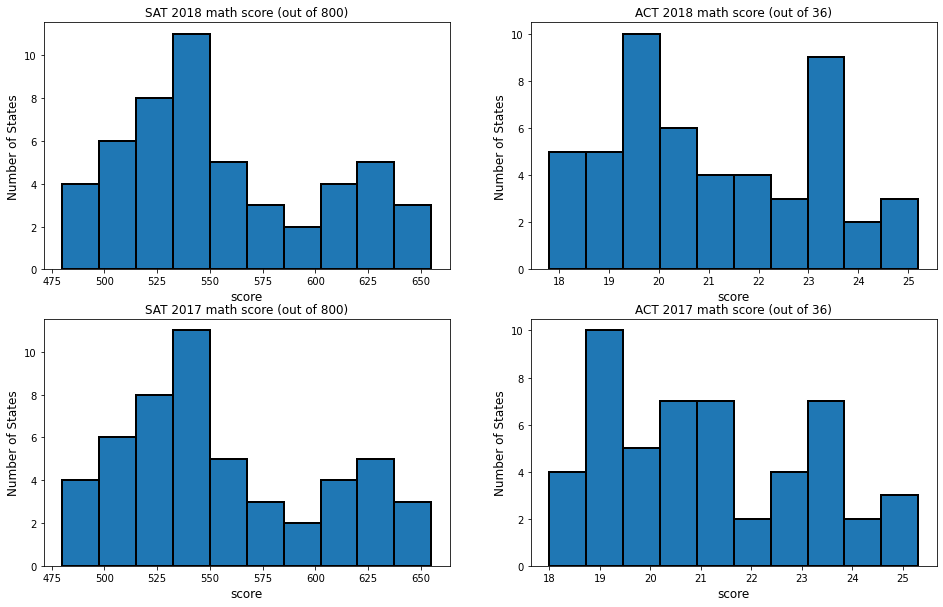

In [78]:
# Code
list_of_columns = ['sat18_math', 'act18_math', 'sat18_math', 'act17_math']
list_of_titles = ['SAT 2018 math score (out of 800)', 'ACT 2018 math score (out of 36)', 'SAT 2017 math score (out of 800)', 'ACT 2017 math score (out of 36)']
list_of_xlabels = ['score' for i in list_of_columns]
subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

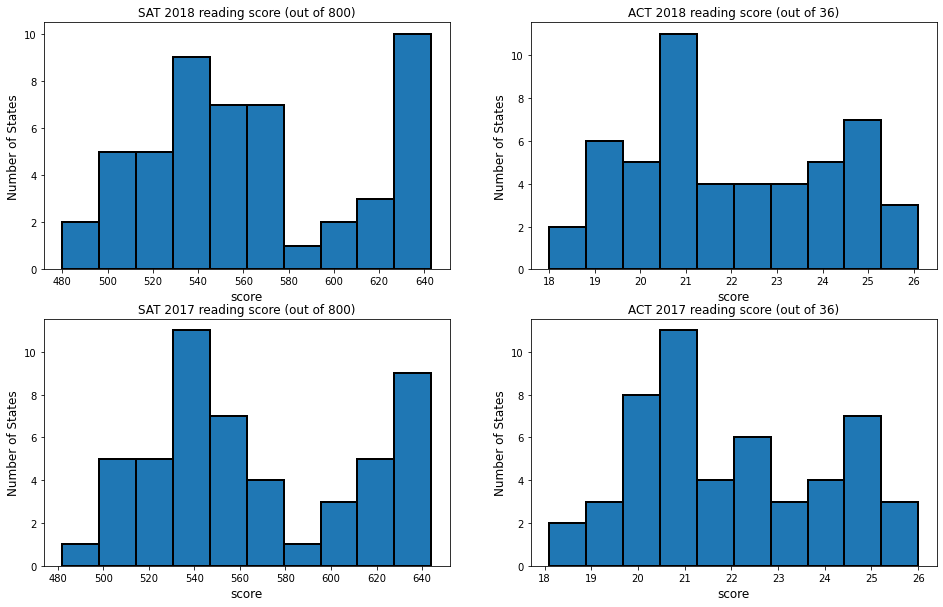

In [79]:
list_of_columns = ['sat18_read_and_write', 'act18_reading', 'sat17_read_and_write', 'act17_reading']
list_of_titles = ['SAT 2018 reading score (out of 800)', 'ACT 2018 reading score (out of 36)', 'SAT 2017 reading score (out of 800)', 'ACT 2017 reading score (out of 36)']
list_of_xlabels = ['score' for i in list_of_columns]
subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [80]:
# Code
def subplot_scatter(dataframe, list_of_ylabels, list_of_titles, list_of_xlabels):                                                
    nrows = int(np.ceil(len(list_of_xlabels)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,5*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_xlabels): # Gives us an index value to get into all our lists
        # Set titles, labels, etc here for each subplot
        ax[i].scatter(dataframe[column], dataframe[list_of_ylabels[i]])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].plot([0,1],[0,1], transform=ax[i].transAxes, color='red', linestyle='dashed', linewidth=1)

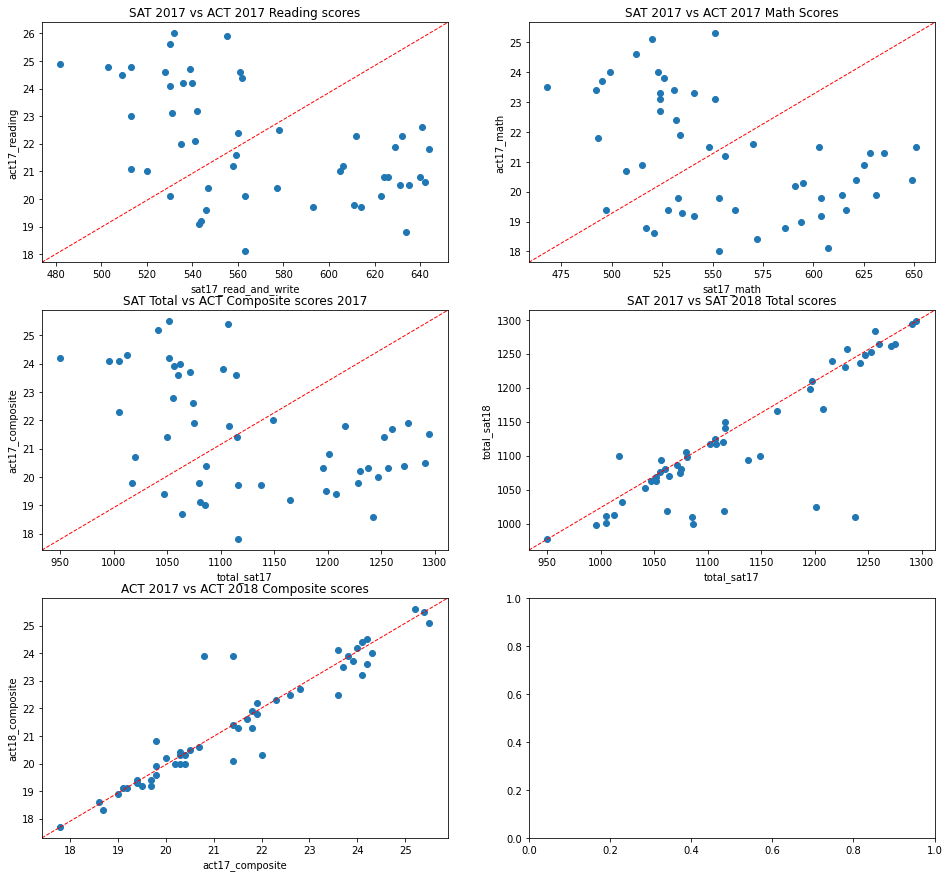

In [81]:
list_of_xlabels = ['sat17_read_and_write','sat17_math','total_sat17','total_sat17', 'act17_composite']
list_of_ylabels = ['act17_reading','act17_math','act17_composite', 'total_sat18', 'act18_composite']  
xlabels = ['SAT 2017 Reading score','SAT 2017 Math score', 'SAT 2017 Total score', 'SAT 2017 Total score', 'ACT 2017 Composite score']
ylabels = ['ACT 2017 Reading score', 'ACT 2017 Math score','ACT 2017 Composite score', 'SAT 2018 Total score', 'ACT 2018 Composite score']
list_of_titles = ['SAT 2017 vs ACT 2017 Reading scores','SAT 2017 vs ACT 2017 Math Scores','SAT Total vs ACT Composite scores 2017', 'SAT 2017 vs SAT 2018 Total scores', 'ACT 2017 vs ACT 2018 Composite scores']

subplot_scatter(final,list_of_ylabels, list_of_titles, list_of_xlabels)

The SAT and ACT scores are not exhibiting any clear correlation or patterns since the 2 tests are scored differently and students who typically take either of the tests. Therefore the scatterplots are indicating as such. However, there is clear correlation between 2017 and 2018 total scores for SAT and composite scores for ACT. This could be due to the results being adjusted between the years for consistent scoring. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

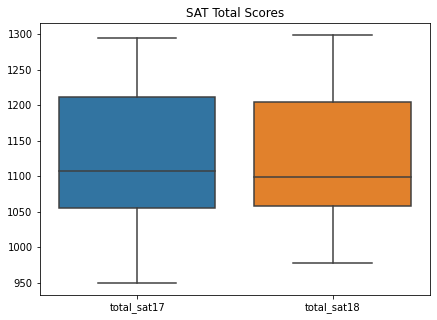

In [82]:
plt.subplots(figsize=(7,5))
plt.title('SAT Total Scores')
xticklabels = ['SAT 2017 Totals', 'SAT 2018 Totals']
sns.boxplot(data=final[['total_sat17', 'total_sat18']])

[Text(0, 0, 'ACT 2017 English'),
 Text(0, 0, 'ACT 2017 Math'),
 Text(0, 0, 'ACT 2017 Reading'),
 Text(0, 0, 'ACT 2017 Science'),
 Text(0, 0, 'ACT 2017 Composite'),
 Text(0, 0, 'ACT 2018 English'),
 Text(0, 0, 'ACT 2018 Math'),
 Text(0, 0, 'ACT 2018 Reading'),
 Text(0, 0, 'ACT 2018 Science'),
 Text(0, 0, 'ACT 2018 Composite')]

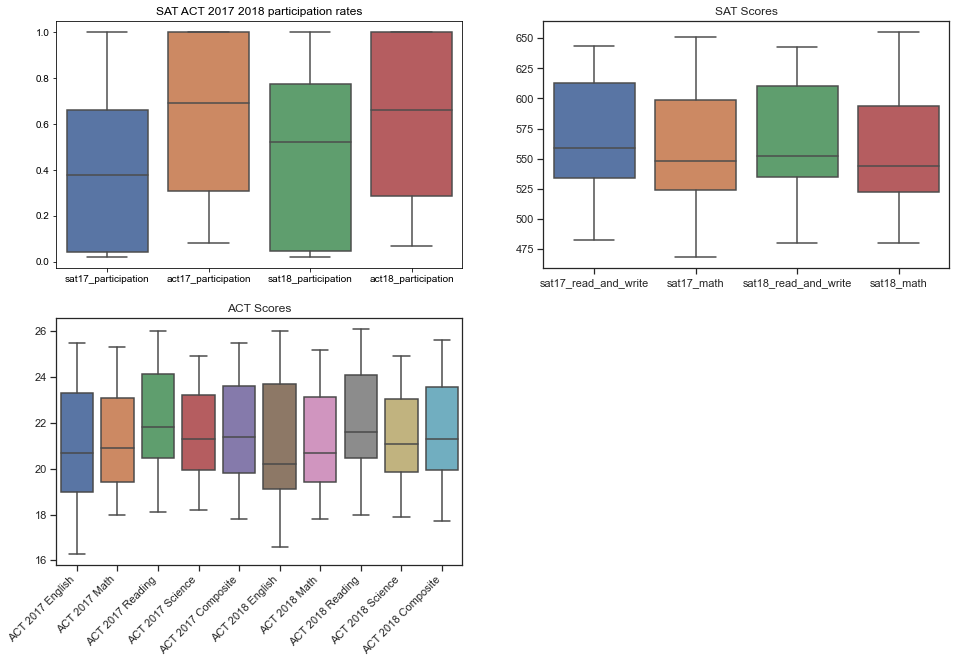

In [83]:
plt.subplots(figsize=(16, 10))
plt.subplot(221)
sns.set(style="ticks")
plt.title('SAT ACT 2017 2018 participation rates')
xticklabels = ['SAT 2017', 'ACT 2017', 'SAT 2018', 'ACT 2018']
sns.boxplot(data=final[['sat17_participation', 'act17_participation', 'sat18_participation', 'act18_participation']])
plt.subplot(222)
plt.title('SAT Scores')
xticklabels = ['SAT 2017 Read and Write','SAT 2017 Math', 'SAT 2018 Read and Write', 'SAT Math']
sns.boxplot(data=final[['sat17_read_and_write', 'sat17_math', 'sat18_read_and_write','sat18_math']])
plt.subplot(223)
plt.title('ACT Scores')
xticklabels = ['ACT 2017 English', 'ACT 2017 Math', 'ACT 2017 Reading', 'ACT 2017 Science', 'ACT 2017 Composite', 'ACT 2018 English', 'ACT 2018 Math', 'ACT 2018 Reading', 'ACT 2018 Science', 'ACT 2018 Composite']
sns.boxplot(data=final[['act17_english', 'act17_math', 'act17_reading', 'act17_science', 'act17_composite', 'act18_english', 'act18_math', 'act18_reading', 'act18_science', 'act18_composite']]).set_xticklabels(xticklabels, rotation=45, ha='right')

There are no outliers in the boxplots since these are plotted for the average scores. The interquartile range for participate rates for ACT is quite consistent between the two years with SAT increasing the upper quartile in 2018. The interquartile is particularly longer for ACT English.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [84]:
def subplot_scatter(dataframe, list_of_ylabels, list_of_titles, list_of_xlabels):                                                
    nrows = int(np.ceil(len(list_of_xlabels)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,5*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_xlabels): # Gives us an index value to get into all our lists
        # Set titles, labels, etc here for each subplot
        ax[i].scatter(dataframe[column], dataframe[list_of_ylabels[i]])
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel(list_of_ylabels[i])
        ax[i].plot([0,1],[0,1], transform=ax[i].transAxes, color='red', linestyle='dashed', linewidth=1)

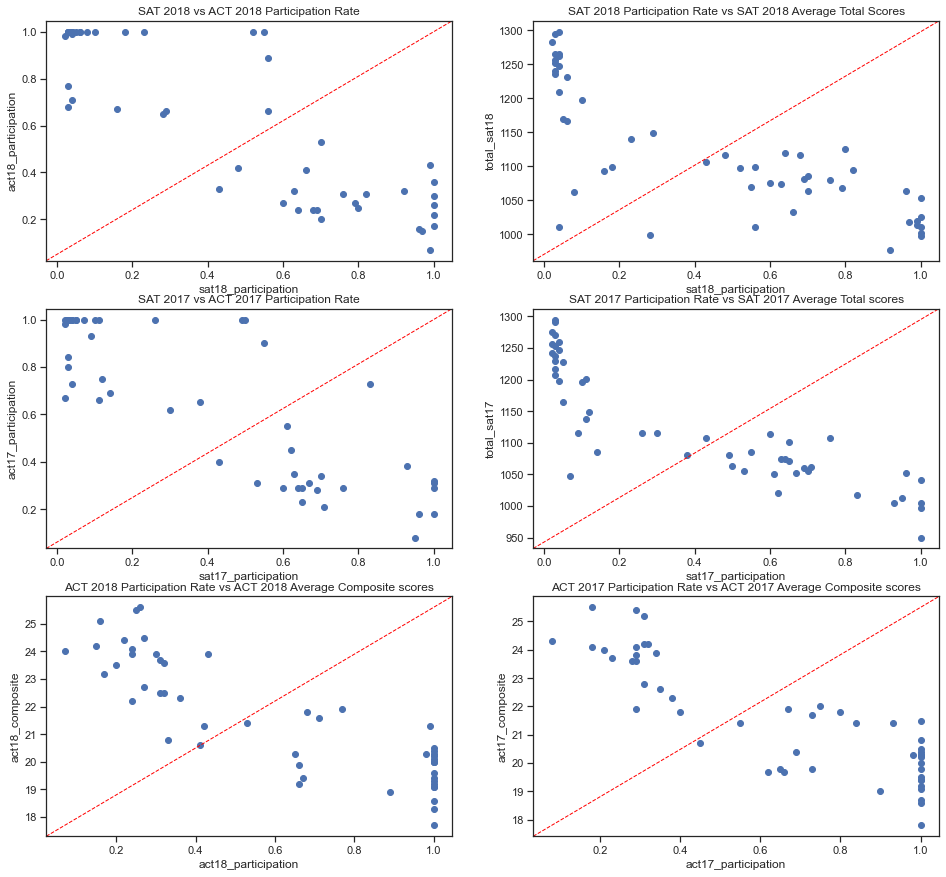

In [85]:
list_of_xlabels = ['sat18_participation','sat18_participation','sat17_participation','sat17_participation', 'act18_participation', 'act17_participation']
list_of_ylabels = ['act18_participation','total_sat18','act17_participation', 'total_sat17', 'act18_composite','act17_composite']  
xlabels = ['SAT 2018 Participation Rate','SAT 2018 Participation Rate', 'SAT 2017 Participation Rate', 'ACT 2018 Participation Rate', 'ACT 2017 Participation Rate']
ylabels = ['ACT 2018 Participation Rate', 'SAT 2018 Average Total Scores', 'SAT 2017 Average Total Scores', 'ACT 2018 Average Composite Scores', 'ACT 2017 Average Composite Scores']
list_of_titles = ['SAT 2018 vs ACT 2018 Participation Rate','SAT 2018 Participation Rate vs SAT 2018 Average Total Scores', 'SAT 2017 vs ACT 2017 Participation Rate', 'SAT 2017 Participation Rate vs SAT 2017 Average Total scores', 'ACT 2018 Participation Rate vs ACT 2018 Average Composite scores','ACT 2017 Participation Rate vs ACT 2017 Average Composite scores']

subplot_scatter(final,list_of_ylabels, list_of_titles, list_of_xlabels)

For both SAT and ACT total/composite scores against participation rate in the two years, it is evident that there is a correlation of between scores and participation rate. Lower average scores are evident when the participation rate is high particularly for ACT whereas SAT has higher average total scores when the participation rate is low, resulting in the cluster in the corners of the plots. There is also an inverse relationship between SAT and ACT participation rate with the clusters on both corners of the plot. 

In [86]:
states1=final[['sat17_participation','sat18_participation']]

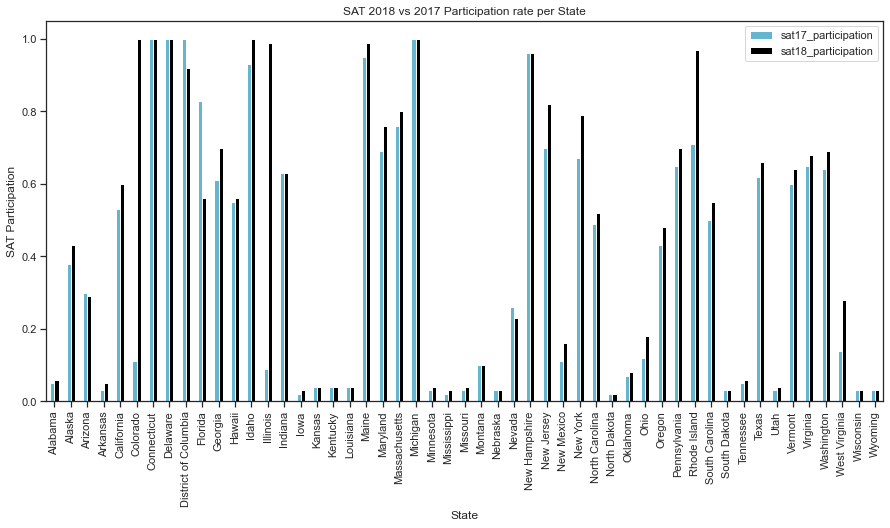

In [87]:
states1.plot(kind='bar', figsize=(15,7), color='c0, c5'); 
plt.xlabel('State');
plt.ylabel('SAT Participation');
plt.title('SAT 2018 vs 2017 Participation rate per State');
plt.xticks(np.arange(len(final['state'])),final['state'])
plt.show()

In [88]:
states2=final[['act17_participation','act18_participation',]]

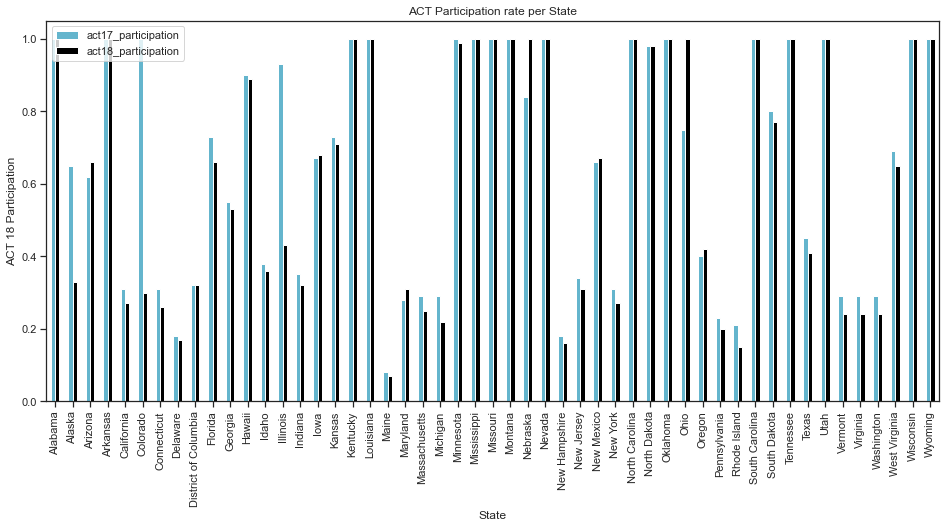

In [89]:
states2.plot(kind='bar', figsize=(16,7), color='c0, c5'); 
plt.xlabel('State');
plt.ylabel('ACT 18 Participation');
plt.title('ACT Participation rate per State');
plt.xticks(np.arange(len(final['state'])),final['state'])
plt.show()

In [90]:
# Compute the change in the participation rate of SAT 
final['sat_change']=final['sat18_participation']-final['sat17_participation']

In [91]:
# Compute the change in the participation rate of ACT
final['act_change']=final['act18_participation']-final['act17_participation']

In [92]:
#Tabulate both set of changes
final[['state', 'sat_change', 'act_change']]

,state,sat_change,act_change
0,Alabama,0.01,0.00
1,Alaska,0.05,-0.32
2,Arizona,-0.01,0.04
3,Arkansas,0.02,0.00
4,California,0.07,-0.04
5,Colorado,0.89,-0.70
6,Connecticut,0.00,-0.05
7,Delaware,0.00,-0.01
8,District of Columbia,-0.08,0.00
9,Florida,-0.27,-0.07


From the bar charts above and the percentage change for the two tests, it is evident that there was a change in the participation rates of Colorado, Illinois and Alaska. We will look into further research for these states below.

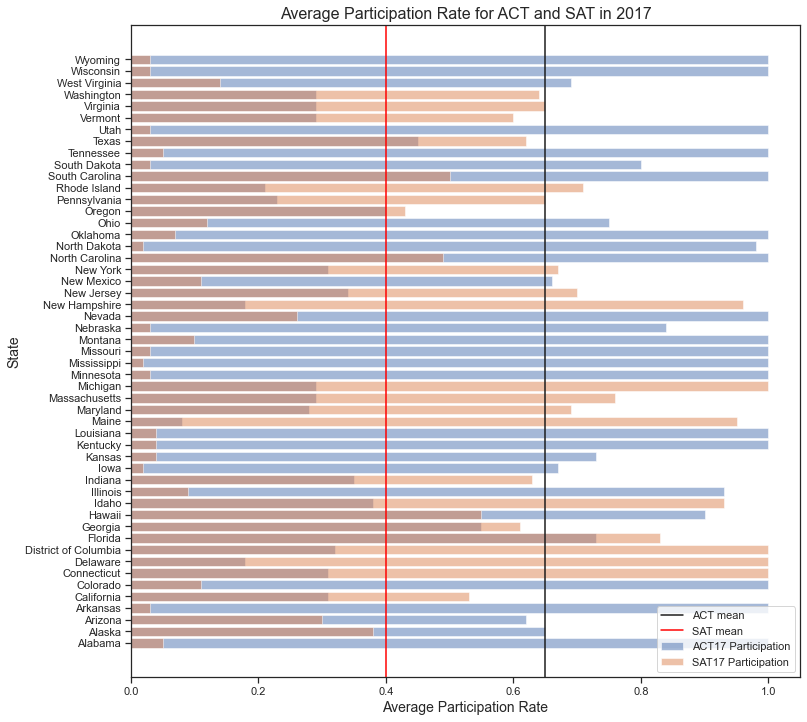

In [93]:
plt.subplots(figsize=(12,12)) 
plt.barh(final.index, final.act17_participation, label='ACT17 Participation', alpha=0.5)
plt.barh(final.index, final.sat17_participation, label='SAT17 Participation', alpha=0.5)
plt.axvline(0.65, label="ACT mean", color='k')  # make a vertical line
plt.axvline(0.40, label="SAT mean", color='red') 
plt.legend(loc='lower right')
plt.title("Average Participation Rate for ACT and SAT in 2017", fontsize=16)
plt.xlabel("Average Participation Rate", fontsize=14)
plt.ylabel("State",fontsize=14)
plt.yticks(np.arange(len(final['state'])),final['state'])
plt.show()

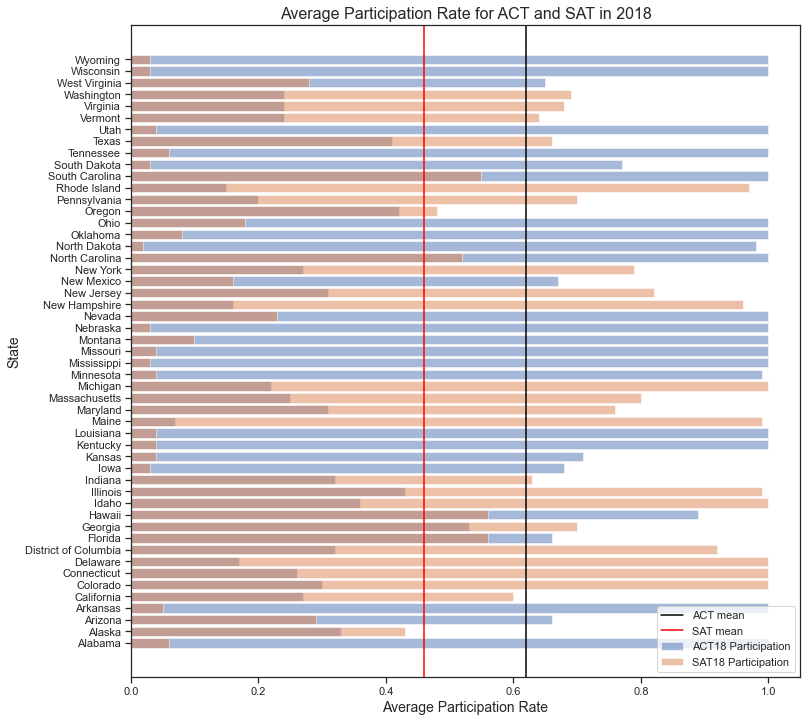

In [94]:
fig, ax = plt.subplots(figsize=(12,12)) 
plt.barh(final.index, final.act18_participation, label='ACT18 Participation', alpha=0.5)
plt.barh(final.index, final.sat18_participation, label='SAT18 Participation', alpha=0.5)
plt.axvline(0.62, label="ACT mean", color='black')  # make a vertical line
plt.axvline(0.46, label="SAT mean", color='red') 
plt.legend(loc='lower right')
plt.title("Average Participation Rate for ACT and SAT in 2018", fontsize=16)
plt.xlabel("Average Participation Rate", fontsize=14)
plt.ylabel("State",fontsize=14)
plt.yticks(np.arange(len(final['state'])),final['state'])
plt.show()

These charts are plotted between ACT and SAT to indicate the difference in the participate rates for each states.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

- [SAT 2018 vs ACT 2018 Participation Rates Across US](https://public.tableau.com/profile/emily2092#!/vizhome/SAT2018vsACT2018ParticipationRatesAcrossU_S_/SATvsACT2018?publish=yes)

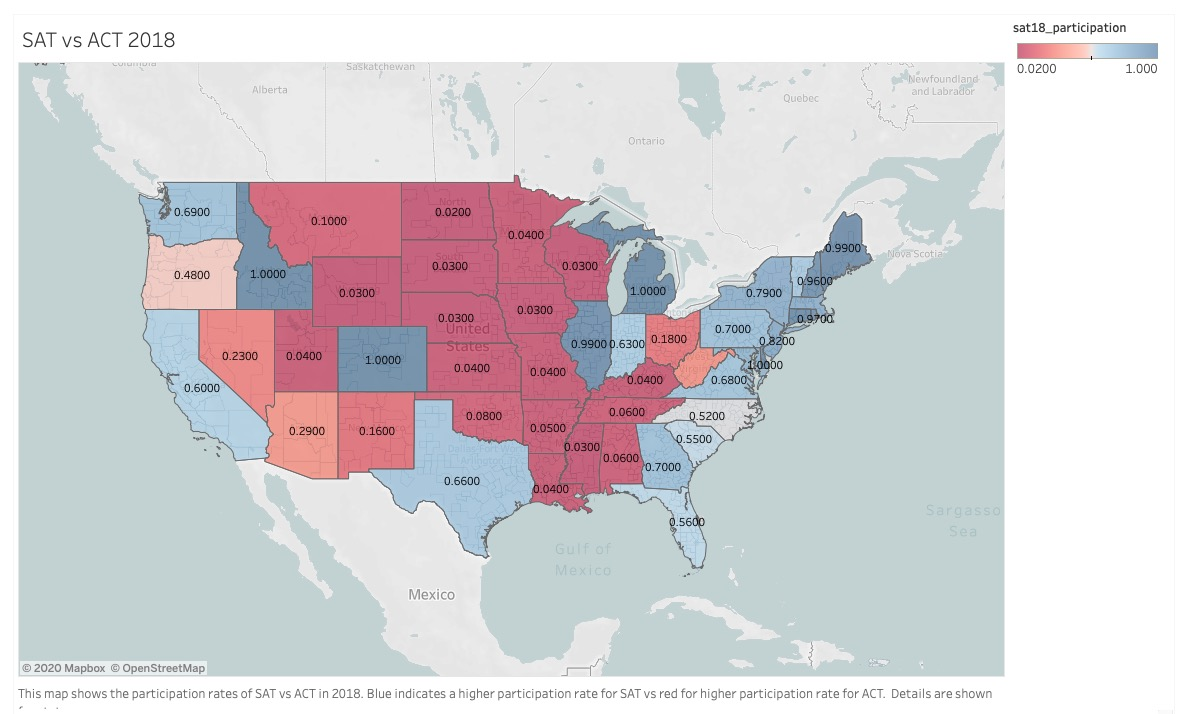

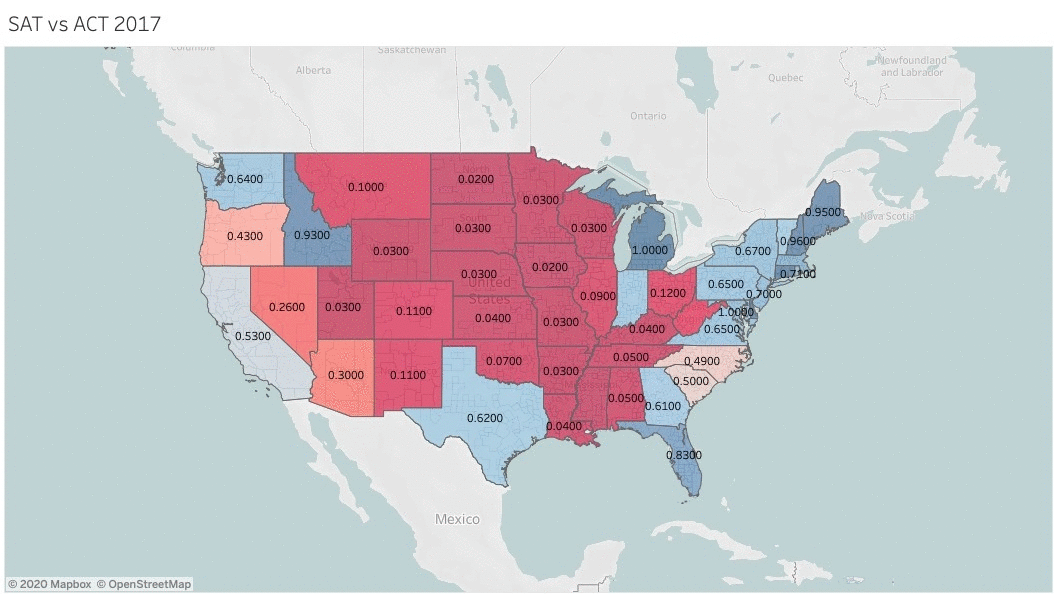

Using Tableau, the participation rates for SAT was plotted against ACT for 2018 where blue shows a higher participation rate for SAT and correspondingly, red is for states with high participation rate for ACT. The number indicated are SAT participation rates where College Board can easily identify the States with particularly low participation rates where the state policies will matter more and efforts directed to pitch for the contracts with the states. Whereas, on the East Coast where SAT tests are already popular with students, College Board can then focus resources on increasing accessibility of SAT tests in these states. Notice how the colors for Colorado, Illinois have both turned blue and other noticeable color changes for California, South Carolina and North Carolina as well.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [95]:
import scipy.stats as stats
def description(dataframe,column):
    n = dataframe[column].describe()['count']
    mean = dataframe[column].describe()['mean']
    std = dataframe[column].describe()['std']
    skew = stats.skew(dataframe[column])
    dis_skew = 6*(n-1)/((n+1)*(n+3))
    kurtosis = stats.kurtosis(dataframe[column])
    dis_kurtosis = 24*(n-2)*(n-3)*n/((n+3)*(n+5)*(n-1)**2)
    norm_dist = (np.abs(skew)<=np.sqrt(dis_skew)) and (np.abs(kurtosis)<=np.sqrt(dis_kurtosis))
    print('{} is {}normally distributed; mean {:.2f}; std {:.2f}; skew {:.2f}'.format(column, '' if norm_dist else 'not ',mean, std, skew))  
                                                                                                                                                                                                                                              
for i in final.columns[1:]:
    description(final,i)

sat18_participation is not normally distributed; mean 0.46; std 0.37; skew 0.13
sat18_read_and_write is not normally distributed; mean 563.69; std 47.50; skew 0.27
sat18_math is not normally distributed; mean 556.24; std 47.77; skew 0.51
total_sat18 is not normally distributed; mean 1120.02; std 94.16; skew 0.45
act18_participation is not normally distributed; mean 0.62; std 0.34; skew -0.02
act18_composite is not normally distributed; mean 21.49; std 2.11; skew 0.27
act18_english is not normally distributed; mean 20.99; std 2.45; skew 0.36
act18_math is not normally distributed; mean 21.13; std 2.04; skew 0.26
act18_reading is not normally distributed; mean 22.02; std 2.17; skew 0.20
act18_science is not normally distributed; mean 21.35; std 1.87; skew 0.17
sat17_participation is not normally distributed; mean 0.40; std 0.35; skew 0.34
sat17_read_and_write is not normally distributed; mean 569.12; std 45.67; skew 0.26
sat17_math is not normally distributed; mean 556.88; std 47.12; ske


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No, as these are not random, independent samples but possibly biased selection of students represented.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: As evident above, the results are not normally distributed for all 3 subjects. It will be inaccurate to run hypothesis testing on such results for estimations. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does not make sense as it can be seen that ACT is compulsory for some states and the same applies for SAT in the graphs above. Whereas for some states, either tests are optional, and for these states, students who are more competent will opt to take these test voluntarily resulting in biased selection and the population is not respresentative of all students compared to states whereby these tests are made compulsory.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: Based on the inverse relation between SAT and ACT participation rates, it is evident that students are mostly taking either of the tests and there are insufficient data to indicate students who have taken both. Certain states have participation rates of more than 100% for both tests combined indicating some students could indeed have taken both. But since students have mostly taken either or, and that these two tests are scored differently (with SAT over 800 and ACT over 36) and may have different approaches to the subject as well. It is meaningless to compare both.

## Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

- [Colorado Switches from ACT to SAT for High School College-Entrance Assessments](https://www.coloradokids.org/colorado-switches-from-act-to-sat-for-high-school-college-entrance-assessments/)
- [Illinois moves ahead with new testing plan, replacing ACT with SAT](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)
- [Illinois Switches From ACT, Will Give Students SAT Instead](https://www.nbcchicago.com/news/local/illinois-switches-from-act-will-give-students-sat-instead-2/118432/)
- [Alaska high school students no longer need national tests to graduate](https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/)
- [List of U.S. states and territories by income](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income)
- [World Population Review-Debt by State](https://worldpopulationreview.com/states/debt-by-state/)
- [Which States Require the SAT? Complete List](https://blog.prepscholar.com/which-states-require-the-sat) 



The articles listed here supports the graphs above where there was a change in the participation rates for Colorado and Illnois for SAT and Alaska for ACT. 

For Colorado and Illinois, it was reported that these states made a decision to switch from ACT to SAT as the required test for high school graduation whereas for Alaska, high school students were no longer required to take ACT resulting in a drop in participation rate in 2018. However, no corresponding increase in SAT was noted but a mere increment. This concludes that state policies play a critical role and to increase the participation rates, College Board must actively work with policies decision makers to pitch for the contracts.   

In [96]:
#Read in the state incmoe data from internet
stateincome = pd.read_csv('../data/stateincome.csv')

In [97]:
stateincome.dtypes

state                      object
per_capita_income           int64
median_household_income     int64
median_family_income        int64
population                  int64
number_of_households        int64
number_of_families          int64
dtype: object

In [98]:
#convert the types to float
stateincome['per_capita_income']=stateincome['per_capita_income'].astype('float64')

In [99]:
#convert the types to float
stateincome['median_household_income']=stateincome['median_household_income'].astype('float64')

In [100]:
#convert the types to float
stateincome['median_family_income']=stateincome['median_family_income'].astype('float64')

In [101]:
#convert the types to float
stateincome['population']=stateincome['population'].astype('float64')

In [102]:
#convert the types to float
stateincome['number_of_households']=stateincome['number_of_households'].astype('float64')

In [103]:
#convert the types to float
stateincome['number_of_families']=stateincome['number_of_families'].astype('float64')

In [104]:
#merge the participation rates for SAT and ACT for 2018 and 2017
satact_1817 = final[["state","sat18_participation","sat17_participation", "act18_participation", "act17_participation"]]

In [105]:
#merge state income data with participation rates
inc_satact_1817 = pd.merge(satact_1817,stateincome, how='left', on ='state')
inc_satact_1817.head()

,state,sat18_participation,sat17_participation,act18_participation,act17_participation,per_capita_income,median_household_income,median_family_income,population,number_of_households,number_of_families
0,Alabama,0.06,0.05,1.00,1.00,23606.0,42830.0,53764.0,4849377.0,1841217.0,1232515.0
1,Alaska,0.43,0.38,0.33,0.65,33062.0,71583.0,82307.0,736732.0,249659.0,165015.0
2,Arizona,0.29,0.30,0.66,0.62,25715.0,50068.0,59700.0,6731484.0,2428743.0,1579481.0
3,Arkansas,0.05,0.03,1.00,1.00,22883.0,41262.0,51528.0,2966369.0,1131288.0,752212.0
4,California,0.60,0.53,0.27,0.31,30441.0,61933.0,71015.0,38802500.0,12758648.0,8762059.0


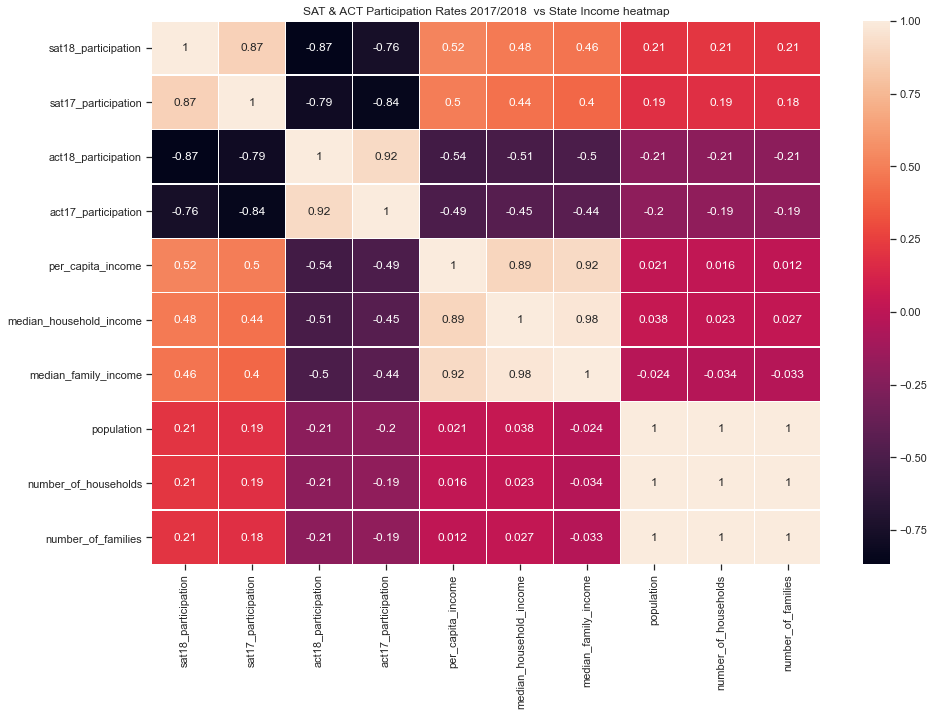

In [106]:
plt.figure(figsize=(15,10))
plt.title('SAT & ACT Participation Rates 2017/2018  vs State Income heatmap')
sns.heatmap(inc_satact_1817.corr(), linewidths=.4, annot=True)

The correlation between SAT participation rates and state income levels are positive as opposed to negative correlation for ACT participation rates. This could indicate SAT tests are not as available for lower income students.

In [120]:
#Combine SAT results for 2018 and 2017
sat_1817 = final[["state","total_sat18","total_sat17"]]

In [121]:
#Merge SAT results with state income statistics
inc_sat_1817 = pd.merge(sat_1817,stateincome, how='left', on ='state')

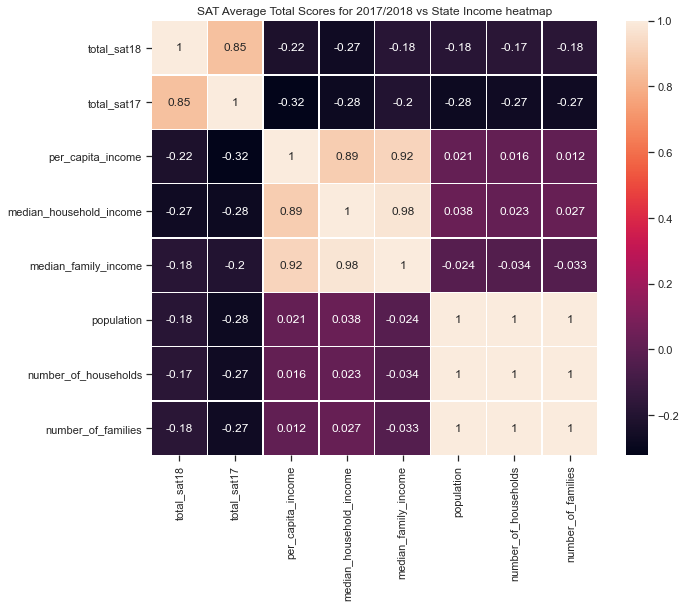

In [122]:
plt.figure(figsize=(10,8))
plt.title('SAT Average Total Scores for 2017/2018 vs State Income heatmap')
sns.heatmap(inc_sat_1817.corr(), linewidths=.4, annot=True)

There is negative correlation between SAT average total scores and state income levels

In [110]:
#Combine ACT results for 2017 and 2018
act_1817 = final[["state","act18_composite","act17_composite"]]

In [111]:
#Merge ACT results with state income statistics
inc_act_1817 = pd.merge(act_1817,stateincome, how='left', on ='state')

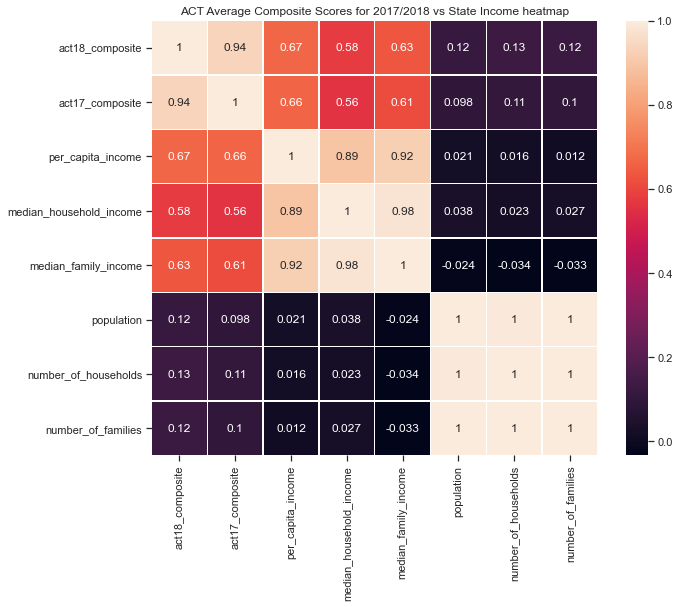

In [112]:
plt.figure(figsize=(10,8))
plt.title('ACT Average Composite Scores for 2017/2018 vs State Income heatmap')
sns.heatmap(inc_act_1817.corr(), linewidths=.4, annot=True)

In contrast to SAT, ACT Average Composite Scores exhibits positive correlation with state income levels.

In [123]:
statedebt = pd.read_csv('../data/statedebt.csv')

In [124]:
#Merge SAT results with state debt statistics
debt_sat_1817 = pd.merge(satact_1817,statedebt, how='left', on ='state')

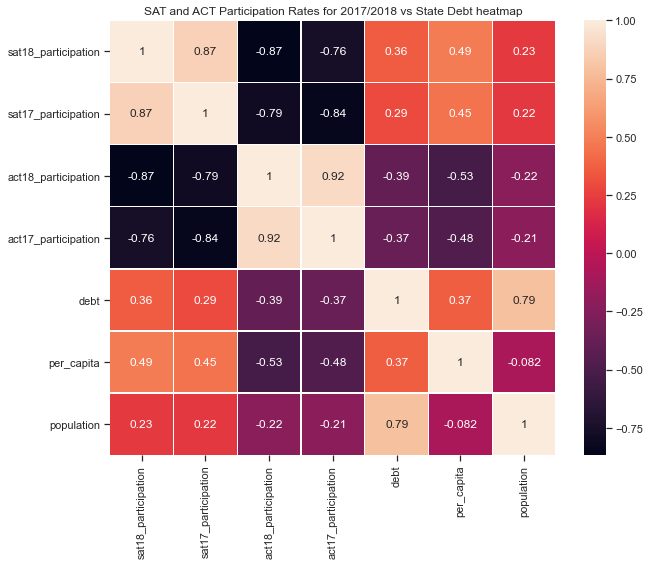

In [125]:
plt.figure(figsize=(10,8))
plt.title('SAT and ACT Participation Rates for 2017/2018 vs State Debt heatmap')
sns.heatmap(debt_sat_1817.corr(), linewidths=.4, annot=True)

While there was positive correlation between State Income for SAT, the heat map also indicates positive relation with state debt level but it is not conclusive if these debts are also in relation to college loans or funds budgeted by respective states for education. Whereas ACT participation rates exhibuted 

In [126]:
#Merge ACT results with state debt
debt_act_1817 = pd.merge(act_1817,statedebt, how='left', on ='state')

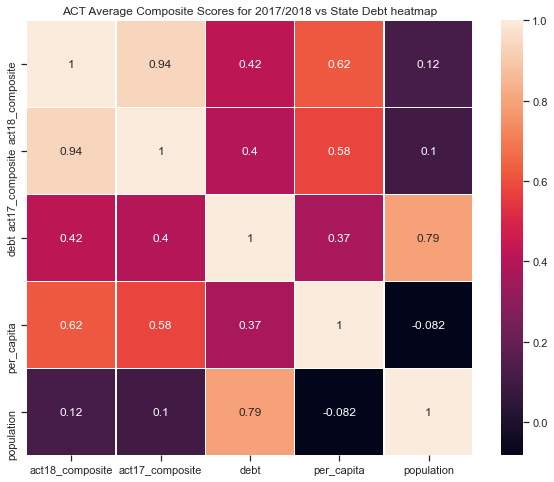

In [127]:
plt.figure(figsize=(10,8))
plt.title('ACT Average Composite Scores for 2017/2018 vs State Debt heatmap')
sns.heatmap(debt_act_1817.corr(), linewidths=.4, annot=True)

In [128]:
#Merge SAT results with state debt statistics
debt_sat_1817 = pd.merge(sat_1817,statedebt, how='left', on ='state')

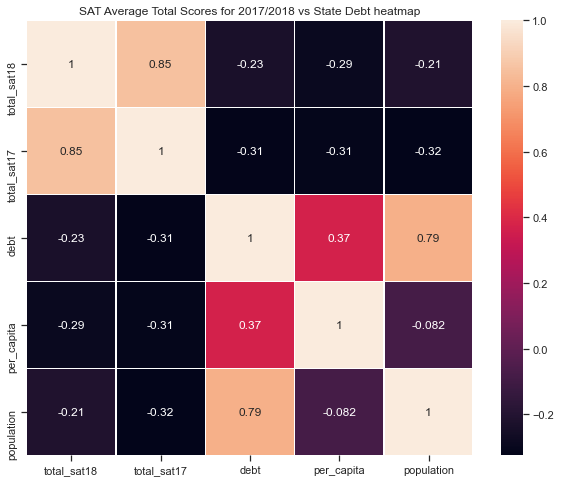

In [129]:
plt.figure(figsize=(10,8))
plt.title('SAT Average Total Scores for 2017/2018 vs State Debt heatmap')
sns.heatmap(debt_sat_1817.corr(), linewidths=.4, annot=True)

There is positive correlation between ACT composite score with state debt and negative correlation between SAT average total scores with state debt. 

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Conclusions and Recommendations

#### Key Observations
1. SAT and ACT participation rates are negatively correlated to each other, in line with the state policies of requiring either of SAT or ACT and not both. 

2. Average test scores are negatively correlated with participation rates for both tests, indicating biased selection since the students who are likely to do well have a higher likelihood to take the test. 

3. Positive correlation was found between SAT participation rates in 2017/2018 with median household income, median family income and per capita income, whereas the same correlation did not exist for ACT participation rates, could possibly indicate SAT tests are not as available to lower income families. 

4. Positive correlation was found between SAT participation rates with state debt but whereas there is a negative correlation between ACT participation rates with state debt which is not in line with point 3. However, it is not conclusive if these debts are also in relation to college loans or funds budgeted by respective states for education.

#### Recommendations
For Colorado and Illinois, it was reported that these states made a decision to switch from ACT to SAT as the required test for high school graduation whereas for Alaska, high school students were no longer required to take ACT resulting in a drop in participation rate in 2018. However, no corresponding increase in SAT was noted but a mere increment. This concludes that state policies play a critical role in increasing participation rates, College Board must actively work with policies decision makers to pitch for the contracts.   

Consider the case of Colorado where the state education board made the decision to switch from ACT to SAT as the standardized test for the State which resulted in the sharp increase in SAT's participation rate in 2018 accompanied by a corresponding sharp fall in ACT participation rate.  [Colorado Kids](https://www.coloradokids.org/wp-content/uploads/2016/01/ACTvsSAT_FINAL.pdf) had published an article on the decision by Colorado to shift from ACT to SAT which College Board should take reference from this success and increase efforts in the following aspects in order to increase its participation rates. 

- Offering free SAT preparation course online 
- Targeting high-achieving, low-income students and provide them with the same opportunities 
- Continue efforts to align SAT tests to Common Core standards

